# Wine Quality Data Set 

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, [consult](http://www.vinhoverde.pt/en/) or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). 

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Reading the data set
labels = ('fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality')
df_white = pd.read_csv('./data/winequality-white.csv', header = 0, names = labels,sep = ';')
df_red = pd.read_csv('./data/winequality-red.csv', header = 0, names = labels, sep = ';')

In [2]:
#assessing the data of white wine
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
#assessing the data of red wine
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
sum(df_white.duplicated())

937

In [7]:
sum(df_red.duplicated())

240

In [8]:
df_white.drop_duplicates(inplace = True)
sum(df_white.duplicated())

0

In [9]:
df_red.drop_duplicates(inplace = True)
sum(df_red.duplicated())

0

In [10]:
df_white.nunique()

fixed_acidity            68
volatile_acidity        125
citric_acid              87
residual_sugar          310
chlorides               160
free_sulfur_dioxide     132
total_sulfur_dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

In [11]:
df_red.nunique()

fixed_acidity            96
volatile_acidity        143
citric_acid              80
residual_sugar           91
chlorides               153
free_sulfur_dioxide      60
total_sulfur_dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [12]:
df_white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [13]:
df_red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Appending Data

In [14]:
# creating color array for red dataframe
df_red['color'] = 'red'
df_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
# creating color array for white dataframe
df_white['color'] = 'white'
df_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,white


In [16]:
# append dataframes
df1 = df_red.append(df_white)
wine_df = df1
# view dataframe to check for success
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [17]:
#Saving the combined data set to winequality_edited.csv
wine_df.to_csv('winequality_edited.csv', index = False)

In [18]:
wine_df = pd.read_csv('winequality_edited.csv')
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


## EDA with Visuals

### Question 1
Based on histograms of columns in the  newly combined dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

#### Answer:
Fixed acidity and Alcohol

In [19]:
% matplotlib inline

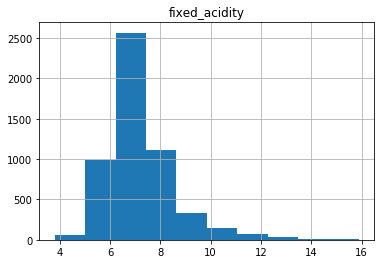

In [20]:
wine_df.hist('fixed_acidity');

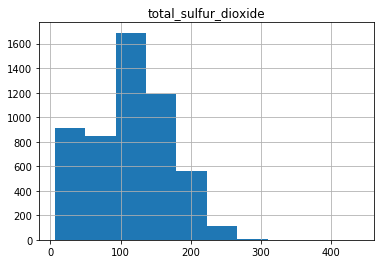

In [21]:
wine_df.hist('total_sulfur_dioxide');

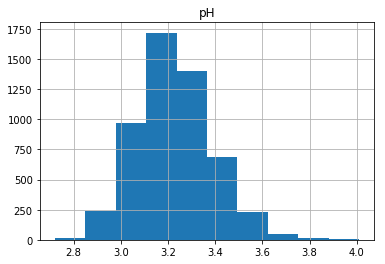

In [22]:
wine_df.hist('pH');

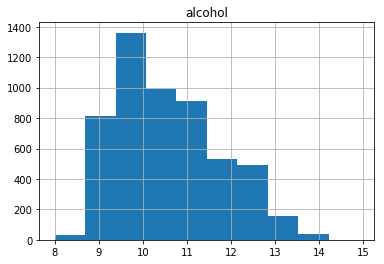

In [23]:
wine_df.hist('alcohol');

### Question 2
Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

#### Answer
Alcohol

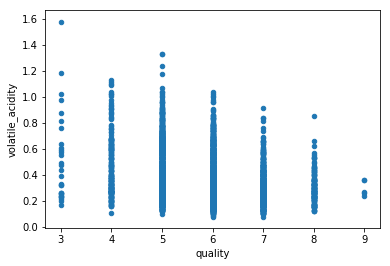

In [24]:
wine_df.plot(x = 'quality', y='volatile_acidity', kind = 'scatter');

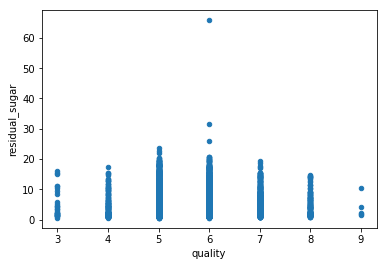

In [25]:
wine_df.plot(x = 'quality', y='residual_sugar', kind = 'scatter');

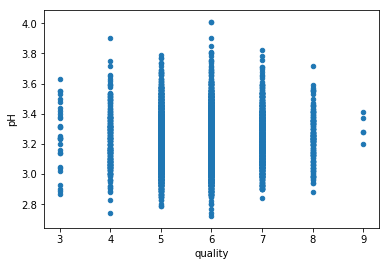

In [26]:
wine_df.plot(x = 'quality', y='pH', kind = 'scatter');

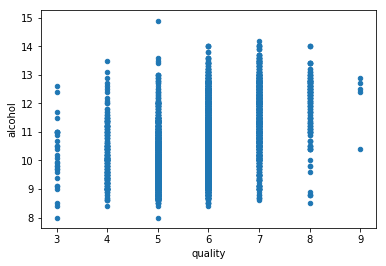

In [27]:
wine_df.plot(x = 'quality', y='alcohol', kind = 'scatter');

### Question 3
Is a certain type of wine (red or white) associated with higher quality?

#### Answer
The mean quality of red wine is less than that of white wine

In [28]:
wine_df.groupby(['color'])['quality'].mean()

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

### Question  4
What level of acidity (pH value) receives the highest average rating?

#### Answer

> Acidity Levels (Conventions) :
1. High: Lowest 25% of pH values
2. Moderately High: 25% - 50% of pH values
3. Medium: 50% - 75% of pH values
4. Low: 75% - max pH value 

'Low level' of acidity recieves highest average rating

In [29]:
# Viewing the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe()['pH']

count    5320.000000
mean        3.224664
std         0.160379
min         2.720000
25%         3.110000
50%         3.210000
75%         3.330000
max         4.010000
Name: pH, dtype: float64

In [30]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.72,3.11,3.21 ,3.32, 4.01 ]

In [31]:
# Labels for the four acidity level groups
bin_names = ['High' ,'Moderately_High' ,'Medium', 'Low' ]

In [32]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,Low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,Moderately_High
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,Moderately_High
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,Low


In [33]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby(['quality'])['acidity_levels'].describe()

,count,unique,top,freq
quality,,,,
3,30,4,Low,11
4,206,4,High,63
5,1752,4,Moderately_High,490
6,2322,4,Medium,589
7,856,4,Low,249
8,148,4,Low,45
9,5,3,Low,2


In [34]:
# Save changes for the next section
wine_df.to_csv('winequality_edited.csv', index=False)

### Question 5
Do wines with higher alcoholic content receive better ratings?

#### Answer
Yes, Wines with higher alcoholic content generally receive better ratings

In [35]:
# getting the median amount of alcohol content
median = wine_df['alcohol'].median()

# selecting samples with alcohol content less than the median
low_alcohol = wine_df.query('alcohol < {}'.format(median))
# selecting samples with alcohol content greater than or equal to the median
high_alcohol = wine_df.query('alcohol >= {}'.format(median))

# getting mean quality rating for the low alcohol and high alcohol groups
mean_quality_low = low_alcohol['quality'].mean()
mean_quality_high = high_alcohol['quality'].mean()

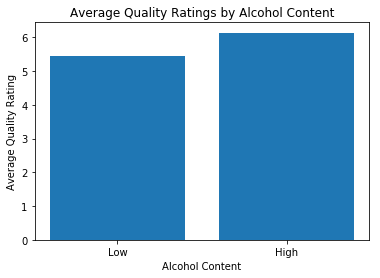

In [36]:
# Creating a bar chart 
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### Question 6
Do sweeter wines generally receive higher ratings?

#### Answer
Yes,  sweeter wines generally receive higher ratings

In [37]:
# getting the median amount of residual sugar
median = wine_df['residual_sugar'].median()

# selecting samples with residual sugar less than the median
low_sugar = wine_df.query('residual_sugar < {}'.format(median))
# selecting samples with residual sugar greater than or equal to the median
high_sugar = wine_df.query('residual_sugar >= {}'.format(median))

# getting mean quality rating for the low sugar and high sugar groups
mean_quality_low = low_sugar['quality'].mean()
mean_quality_high = high_sugar['quality'].mean()

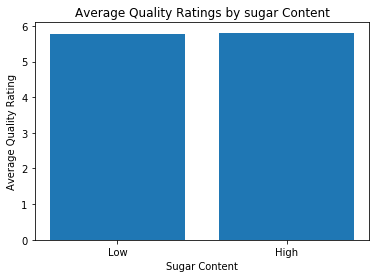

In [38]:
# Creating a bar chart 
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

### Question 7
What level of acidity receives the highest average rating?

#### Answer
Wines with 'Low' level of acidity recieve highest ratings

In [39]:
# Using groupby to get the mean quality for each acidity level
acidity = wine_df.groupby(['acidity_levels'])['quality'].mean()
print(acidity)

acidity_levels
High               5.728024
Moderately_High    5.766917
Medium             5.840183
Low                5.847470
Name: quality, dtype: float64


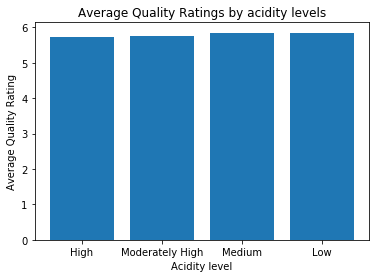

In [40]:
locations = [1, 2, 3, 4]
heights = acidity
labels = ['High', 'Moderately High', 'Medium', 'Low']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by acidity levels')
plt.xlabel('Acidity level')
plt.ylabel('Average Quality Rating');

## Proportions by Wine color and quality

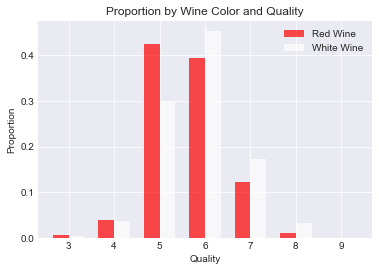

In [41]:
sns.set_style('darkgrid')

# getting counts for each rating and color
color_counts = wine_df.groupby(['color', 'quality']).count()['pH']
color_counts

# getting total counts for each color
color_totals = wine_df.groupby('color').count()['pH']
color_totals

# getting proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

# getting proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
white_proportions

red_proportions['9'] = 0
red_proportions

ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();

## Conclusion
According to analysis done above from the data obtained from [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wine+Quality), i found that
1. The mean quality of red wine is less than that of white wine
2. Wine with 'Low level' of acidity recieves highest average rating from consumers
3. Wines with higher alcoholic content generally receive better ratings
4. Sweeter wines generally receive higher ratings